In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


 Daten einlesen

In [2]:
df = pd.read_csv('netztest-opendata_hours-048.csv')

# Nur plausible Datenpunkte berechnen - vertrauenswürdigen Datenpunkte
df = df[df['implausible'] == False]

# Datum und Uhrzeit in eine einzige Spalte konvertieren
df['Test_Datetime'] = pd.to_datetime(df['time_utc'])
df.set_index('Test_Datetime', inplace=True)


1. Anzahl der Speedtests pro Stunde

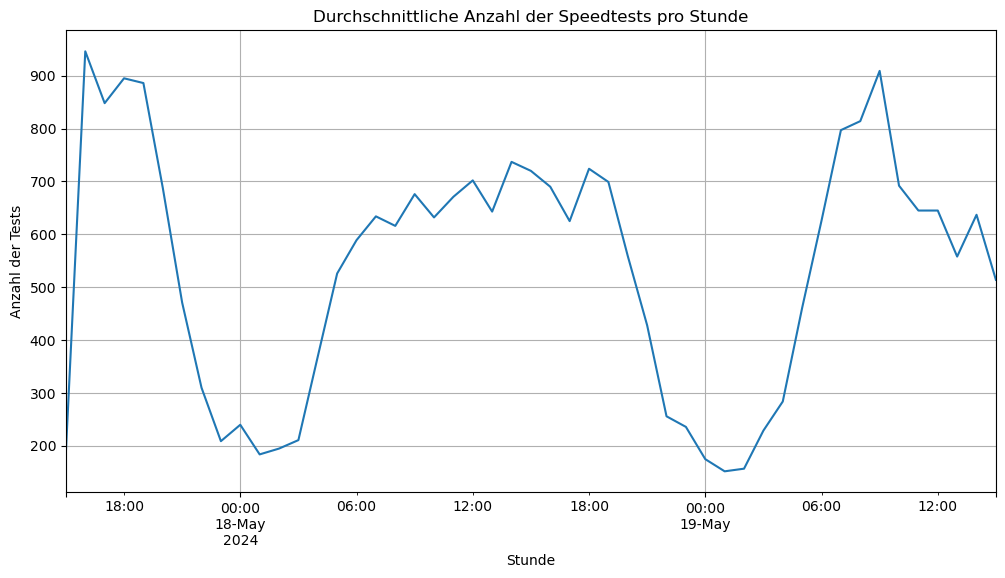

Durchschnittliche Anzahl der Speedtests pro Stunde: 536.71


In [3]:
tests_per_hour = df.resample('H').size()
average_tests_per_hour = tests_per_hour.mean()

# Visualisierung
plt.figure(figsize=(12, 6))
tests_per_hour.plot()
plt.title('Durchschnittliche Anzahl der Speedtests pro Stunde')
plt.xlabel('Stunde')
plt.ylabel('Anzahl der Tests')
plt.grid(True)
plt.show()

print(f'Durchschnittliche Anzahl der Speedtests pro Stunde: {average_tests_per_hour:.2f}')


2. Tageszeiten, zu denen die meisten Speedtests durchgeführt werden

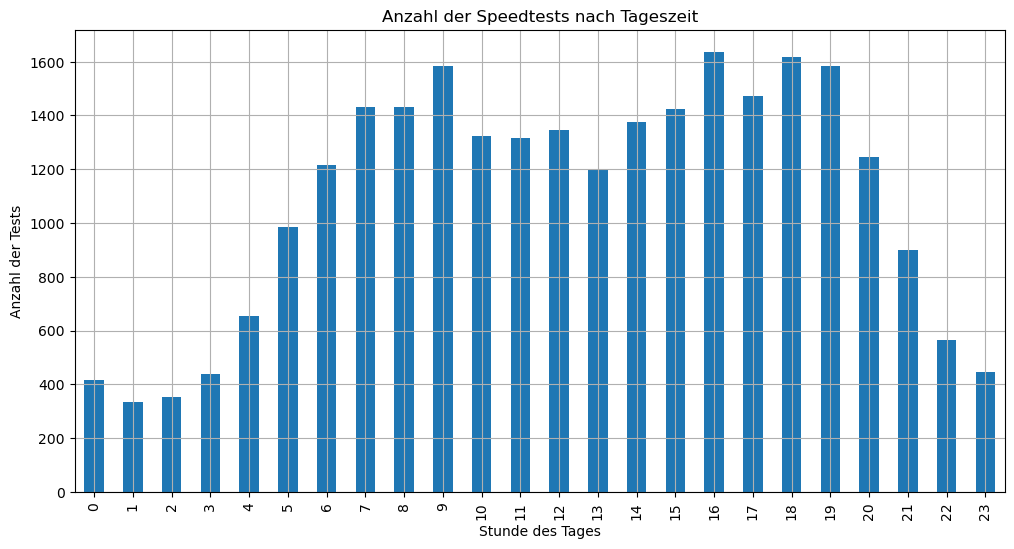

In [4]:
tests_per_hour_of_day = df.groupby(df.index.hour).size()

# Visualisierung
plt.figure(figsize=(12, 6))
tests_per_hour_of_day.plot(kind='bar')
plt.title('Anzahl der Speedtests nach Tageszeit')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Tests')
plt.grid(True)
plt.show()


3. Durchschnittliche Download-Geschwindigkeit pro Technologie

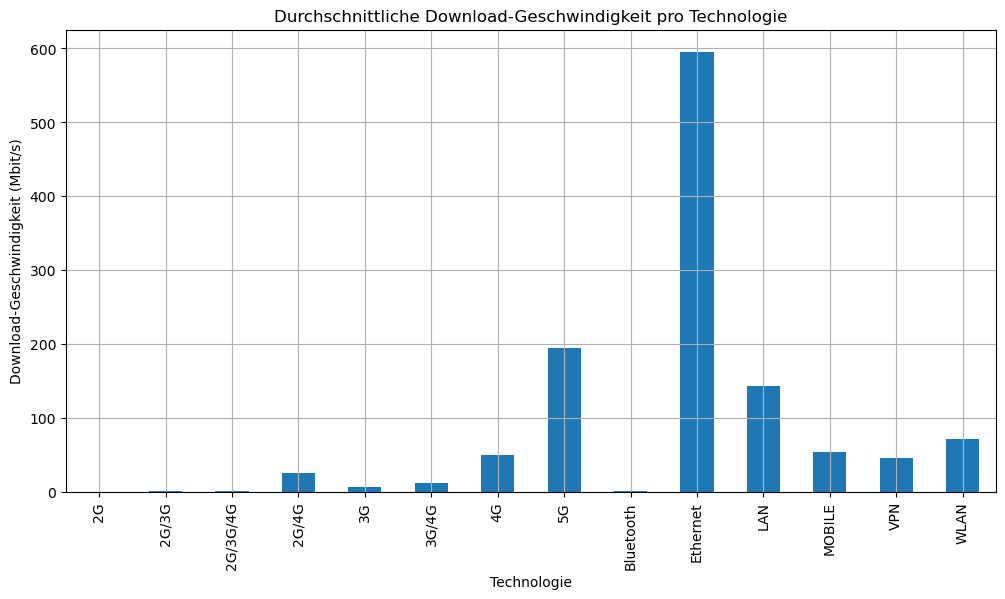

In [5]:
# Geschwindigkeit in Mbit/s umrechnen
df['Download_Mbit'] = df['download_kbit'] / 1000

# Durchschnittliche Geschwindigkeit pro Technologie
average_download_speed_by_technology = df.groupby('cat_technology')['Download_Mbit'].mean()

# Visualisierung
plt.figure(figsize=(12, 6))
average_download_speed_by_technology.plot(kind='bar')
plt.title('Durchschnittliche Download-Geschwindigkeit pro Technologie')
plt.xlabel('Technologie')
plt.ylabel('Download-Geschwindigkeit (Mbit/s)')
plt.grid(True)
plt.show()


4. Download- und Upload-Geschwindigkeiten, die 80% der Nutzeren erreichen


                                      LAN      WLAN       4G
Download 80%-Perzentil (Mbit/s)  236.0986  106.8862  86.6314
Upload 80%-Perzentil (Mbit/s)     51.2748   36.1730  21.0956


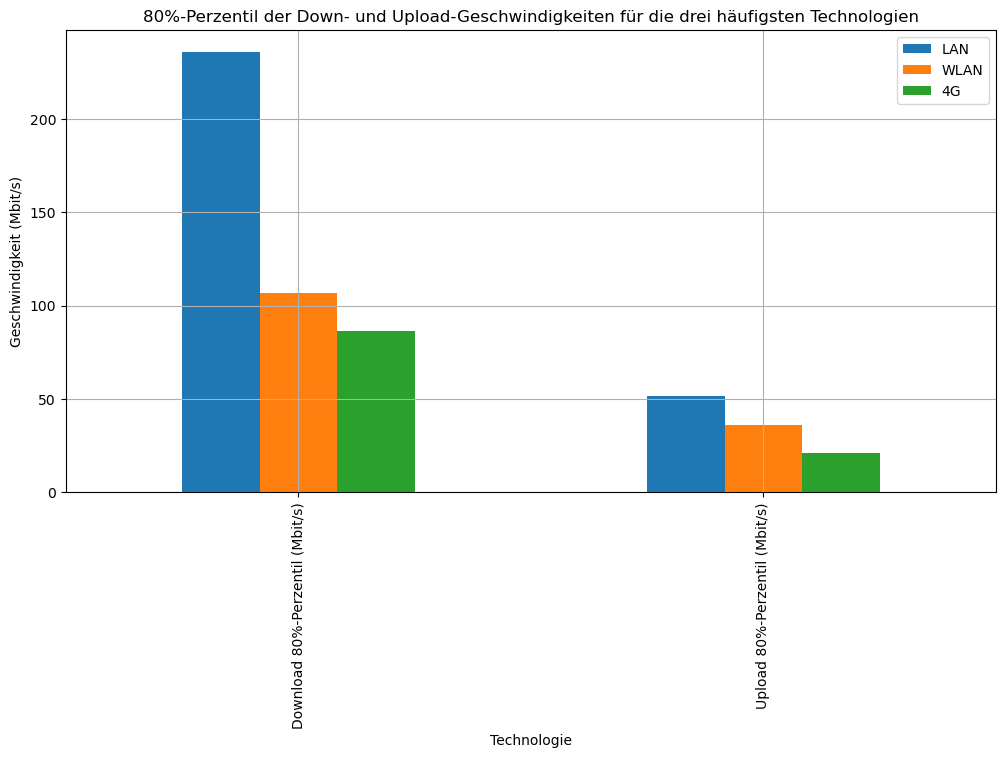

In [6]:
# Zählen wie oft jede Technologie vorkommt
top_technologies = df['cat_technology'].value_counts().nlargest(3).index
percentiles = {}

# 80%-Perzentil der Geschwindigkeit für jede Technologie berechnen
for tech in top_technologies:
    tech_data = df[df['cat_technology'] == tech]
    download_percentile = np.percentile(tech_data['Download_Mbit'], 80)
    upload_percentile = np.percentile(tech_data['upload_kbit'] / 1000, 80)
    percentiles[tech] = (download_percentile, upload_percentile)

# Ergebnis ausgeben
percentiles_df = pd.DataFrame(percentiles, index=['Download 80%-Perzentil (Mbit/s)', 'Upload 80%-Perzentil (Mbit/s)'])
print(percentiles_df)

# Visualisierung
percentiles_df.plot(kind='bar', figsize=(12, 6))
plt.title('80%-Perzentil der Down- und Upload-Geschwindigkeiten für die drei häufigsten Technologien')
plt.xlabel('Technologie')
plt.ylabel('Geschwindigkeit (Mbit/s)')
plt.grid(True)
plt.show()
